# Exploration of Neural Network libraries in Python:
# Training a Feedforward Neural Network for Regression

#### 1. Benchmark: Logistic Regression (scikit-learn)
    
#### 2. Classification
    2.1 Benchmark
    2.2 Keras NN
    2.3 Ensamble of models

#### 3. Regression
    3.1 Benchmark
    3.2 Keras NN
    
#### 4. Others
    4.1 PyBrain
    4.2 Tensorflow (Deep Neural Network Classifier)

In [34]:
import sys, os
sys.path.append(os.path.join(os.getcwd().split('ICM')[0], 'ICM', 'code'))
sys.path.append(os.path.join(os.getcwd().split('ICM')[0], 'ICM', 'code', 'notebooks', 'libs'))

import sys
sys.path.append("..")
from ICM_utils import helper, evaluation, metrics
import ICM_utils as utils
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.utils.np_utils import to_categorical

%matplotlib inline 
import time, math

/Users/patricfulop/anaconda3/envs/cancer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/patricfulop/anaconda3/envs/cancer/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
IMC_basedir = os.getcwd().split('code')[0]
DATA_AMELIA_FILE = os.path.join(IMC_basedir, 'data/imputed_dataset_no_censoring_26022018_Amelia1.csv')
DATA_MICE_FILE = os.path.join(IMC_basedir, 'data/imputed_dataset_no_censoring_26022018_MICE.csv')
TRAIN_FILE = os.path.join(IMC_basedir, 'data/amelia_train')
TEST_FILE = os.path.join(IMC_basedir, 'data/amelia_test')
MODEL_DIR = os.path.join(IMC_basedir, 'data/amelia_model')

In [4]:
df, labels = utils.process_amelia(DATA_MICE_FILE)

In [16]:
X_train_r, Y_train_r, X_test_r, Y_test_r = utils.get_train_test_data(df, regression=True, train_size=0.8)
X_train_c, Y_train_c, X_test_c, Y_test_c = utils.get_train_test_data(df, regression=False, train_size=0.8)

/Users/patricfulop/anaconda3/envs/cancer/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 1. Benchmark Logistic Regression (Scikit-learn)

/Users/patricfulop/anaconda3/envs/cancer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/patricfulop/anaconda3/envs/cancer/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

     1.2year       0.49      0.59      0.54       128
    2.5years       0.44      0.33      0.38       145
        more       0.71      0.77      0.74       145

   micro avg       0.56      0.56      0.56       418
   macro avg       0.55      0.56      0.55       418
weighted avg       0.55      0.56      0.55       418

Accuracy: 0.562200956937799
Mean square error (MSE): 0.62
R^2: 0.56


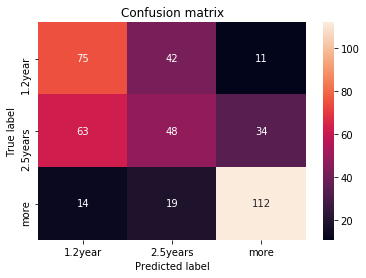

In [6]:
# Create logistic regression object
regr = linear_model.LogisticRegression()             
regr.fit(X_train_c, Y_train_c) 

Y_pred = regr.predict(X_test_c)
            
utils.plot_report(Y_test_c, Y_pred, labels)

# print ('Coefficients:', regr.coef_, regr.intercept_ )               
print("Mean square error (MSE): %.2f"
      % np.mean((Y_pred - Y_test_c) ** 2))      # The mean square error
print ('R^2: %.2f' % regr.score(X_test_c, Y_test_c) )  # Explained variance score

In [ ]:
# Regression

In [ ]:
regr = LinearSVC()
regr.fit(X_train_r, Y_train_r) 

Y_pred = regr.predict(X_test_r)

# print ('Coefficients:', regr.coef_, regr.intercept_ )               
print("Mean square error (MSE): %.2f"
      % np.mean((Y_pred - Y_test_r) ** 2))      # The mean square error
print ('R^2: %.2f' % regr.score(X_test_r, Y_test_r) )  # Explained variance score

### 1.1 Benchmark Linear SVC

In [ ]:
svc = LinearSVC(random_state=0)
svc.fit(X_train_c, Y_train_c)

In [ ]:
Y_pred = svc.predict(X_test_c)
            
utils.plot_report(Y_test_c, Y_pred, labels)

# print ('Coefficients:', regr.coef_, regr.intercept_ )               
print("Mean square error (MSE): %.2f"
      % np.mean((Y_pred - Y_test_c) ** 2))      # The mean square error
print ('R^2: %.2f' % regr.score(X_test_c, Y_test_c) )  # Explained variance score

In [ ]:
# Regression

In [ ]:
svc = LinearSVC(random_state=0)
svc.fit(X_train_r, Y_train_r)

In [ ]:
Y_pred = svc.predict(X_test_r)
            
# print ('Coefficients:', regr.coef_, regr.intercept_ )               
print("Mean square error (MSE): %.2f"
      % np.mean((Y_pred - Y_test_r) ** 2))      # The mean square error
print ('R^2: %.2f' % regr.score(X_test_r, Y_test_r) )  # Explained variance score

## 2.1 Classification: Benchmark

In [7]:
# need the full dataset for cross validation
X = df.copy(deep=True)

Y = np.array(X['life_expectancy_bin'])
# remove columns
X.drop('life_expectancy', axis = 1, inplace=True)
X.drop('life_expectancy_bin', axis = 1, inplace=True)

X = np.array(X)

In [12]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=53, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [14]:
results = cross_val_score(estimator, X, Y, cv=KFold(n_splits=2, shuffle=True))
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 46.45% (12.90%)


## 2.1 Classification: Keras NN

In [17]:
seed = 7
np.random.seed(seed)

model = Sequential()
# model.add(Dense(108, input_shape=(54,), kernel_initializer='normal', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(32, kernel_initializer='normal', activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(16, kernel_initializer='normal', activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(8, kernel_initializer='normal', activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

model.add(Dense(64, activation='relu', input_dim=53))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# model.add(Dense(input_dim=54, output_dim=12, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(input_dim=12, output_dim=12, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(output_dim=1, activation='softmax'))
# model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['accuracy'])

# 3
#tbCallBack = keras.callbacks.TensorBoard(log_dir='/tmp/keras_logs', write_graph=True)

# 4
#model.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['accuracy'])

model.summary()

hist = model.fit(np.array(X_train_c), np.array(to_categorical(Y_train_c)), 
                 epochs=600, batch_size=128,  verbose=1, validation_split=0.3)#, callbacks=[tbCallBack])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                3456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 7,811
Trainable params: 7,811
Non-trainable params: 0
_________________________________________________________________
Train on 1167 samples, validate on 501 samples
Epoch 1/600
1167/1167 [==============================] - 0s 384us/step - loss: 2.9985 - acc: 

1167/1167 [==============================] - 0s 30us/step - loss: 0.8676 - acc: 0.5878 - val_loss: 0.8425 - val_acc: 0.6267
Epoch 54/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.8858 - acc: 0.5810 - val_loss: 0.9158 - val_acc: 0.5669
Epoch 55/600
1167/1167 [==============================] - 0s 36us/step - loss: 0.8877 - acc: 0.5801 - val_loss: 0.8407 - val_acc: 0.6307
Epoch 56/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.8754 - acc: 0.5733 - val_loss: 0.8614 - val_acc: 0.5709
Epoch 57/600
1167/1167 [==============================] - 0s 40us/step - loss: 0.8707 - acc: 0.5767 - val_loss: 0.8493 - val_acc: 0.6307
Epoch 58/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.8729 - acc: 0.5570 - val_loss: 0.8845 - val_acc: 0.6028
Epoch 59/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.8700 - acc: 0.5707 - val_loss: 0.8537 - val_acc: 0.6267
Epoch 60/600
1167/1167 [==============================

Epoch 113/600
1167/1167 [==============================] - 0s 54us/step - loss: 0.8189 - acc: 0.5990 - val_loss: 0.8510 - val_acc: 0.6327
Epoch 114/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.8179 - acc: 0.5904 - val_loss: 0.8546 - val_acc: 0.6228
Epoch 115/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.8146 - acc: 0.6144 - val_loss: 0.8730 - val_acc: 0.6048
Epoch 116/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.8270 - acc: 0.6135 - val_loss: 0.8833 - val_acc: 0.6028
Epoch 117/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.8148 - acc: 0.5955 - val_loss: 0.8585 - val_acc: 0.6248
Epoch 118/600
1167/1167 [==============================] - 0s 34us/step - loss: 0.8089 - acc: 0.6075 - val_loss: 0.9120 - val_acc: 0.5988
Epoch 119/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.8158 - acc: 0.6230 - val_loss: 0.8924 - val_acc: 0.5928
Epoch 120/600
1167/1167 [=========

1167/1167 [==============================] - 0s 38us/step - loss: 0.7739 - acc: 0.6178 - val_loss: 0.9283 - val_acc: 0.5808
Epoch 173/600
1167/1167 [==============================] - 0s 32us/step - loss: 0.7670 - acc: 0.6384 - val_loss: 0.9633 - val_acc: 0.5649
Epoch 174/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.7789 - acc: 0.6230 - val_loss: 0.9255 - val_acc: 0.5988
Epoch 175/600
1167/1167 [==============================] - 0s 52us/step - loss: 0.7636 - acc: 0.6178 - val_loss: 0.8880 - val_acc: 0.6068
Epoch 176/600
1167/1167 [==============================] - 0s 54us/step - loss: 0.7715 - acc: 0.6298 - val_loss: 0.8940 - val_acc: 0.6287
Epoch 177/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.7822 - acc: 0.6187 - val_loss: 0.8959 - val_acc: 0.6148
Epoch 178/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.7653 - acc: 0.6341 - val_loss: 0.8920 - val_acc: 0.6148
Epoch 179/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 28us/step - loss: 0.7365 - acc: 0.6538 - val_loss: 0.9396 - val_acc: 0.5908
Epoch 232/600
1167/1167 [==============================] - 0s 32us/step - loss: 0.7295 - acc: 0.6530 - val_loss: 0.9732 - val_acc: 0.6008
Epoch 233/600
1167/1167 [==============================] - 0s 27us/step - loss: 0.7323 - acc: 0.6607 - val_loss: 1.0040 - val_acc: 0.5749
Epoch 234/600
1167/1167 [==============================] - 0s 31us/step - loss: 0.7216 - acc: 0.6564 - val_loss: 0.9824 - val_acc: 0.6008
Epoch 235/600
1167/1167 [==============================] - 0s 32us/step - loss: 0.7303 - acc: 0.6512 - val_loss: 0.9557 - val_acc: 0.5988
Epoch 236/600
1167/1167 [==============================] - 0s 28us/step - loss: 0.7327 - acc: 0.6538 - val_loss: 0.9618 - val_acc: 0.5968
Epoch 237/600
1167/1167 [==============================] - 0s 32us/step - loss: 0.7310 - acc: 0.6495 - val_loss: 0.9797 - val_acc: 0.5768
Epoch 238/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 34us/step - loss: 0.6776 - acc: 0.6838 - val_loss: 1.0471 - val_acc: 0.5788
Epoch 291/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.6900 - acc: 0.6761 - val_loss: 1.0680 - val_acc: 0.5369
Epoch 292/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.6780 - acc: 0.6829 - val_loss: 1.0436 - val_acc: 0.5709
Epoch 293/600
1167/1167 [==============================] - 0s 32us/step - loss: 0.6722 - acc: 0.6907 - val_loss: 1.0440 - val_acc: 0.6008
Epoch 294/600
1167/1167 [==============================] - 0s 36us/step - loss: 0.6740 - acc: 0.6881 - val_loss: 1.1155 - val_acc: 0.5689
Epoch 295/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.6801 - acc: 0.6855 - val_loss: 1.0323 - val_acc: 0.5709
Epoch 296/600
1167/1167 [==============================] - 0s 34us/step - loss: 0.6804 - acc: 0.6829 - val_loss: 1.0637 - val_acc: 0.5948
Epoch 297/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 36us/step - loss: 0.6415 - acc: 0.6975 - val_loss: 1.1143 - val_acc: 0.6008
Epoch 350/600
1167/1167 [==============================] - 0s 37us/step - loss: 0.6293 - acc: 0.7069 - val_loss: 1.1322 - val_acc: 0.5609
Epoch 351/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.6289 - acc: 0.7129 - val_loss: 1.1113 - val_acc: 0.5509
Epoch 352/600
1167/1167 [==============================] - 0s 43us/step - loss: 0.6260 - acc: 0.7172 - val_loss: 1.1756 - val_acc: 0.5529
Epoch 353/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.6494 - acc: 0.6932 - val_loss: 1.1969 - val_acc: 0.5409
Epoch 354/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.6276 - acc: 0.7052 - val_loss: 1.1378 - val_acc: 0.5449
Epoch 355/600
1167/1167 [==============================] - 0s 36us/step - loss: 0.6325 - acc: 0.7052 - val_loss: 1.1229 - val_acc: 0.5689
Epoch 356/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 42us/step - loss: 0.6029 - acc: 0.7155 - val_loss: 1.2146 - val_acc: 0.5509
Epoch 409/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.5942 - acc: 0.7378 - val_loss: 1.1988 - val_acc: 0.5569
Epoch 410/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.5821 - acc: 0.7352 - val_loss: 1.2015 - val_acc: 0.5669
Epoch 411/600
1167/1167 [==============================] - 0s 41us/step - loss: 0.5672 - acc: 0.7438 - val_loss: 1.2785 - val_acc: 0.5649
Epoch 412/600
1167/1167 [==============================] - 0s 42us/step - loss: 0.5831 - acc: 0.7378 - val_loss: 1.1985 - val_acc: 0.5469
Epoch 413/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.5766 - acc: 0.7352 - val_loss: 1.2088 - val_acc: 0.5669
Epoch 414/600
1167/1167 [==============================] - 0s 44us/step - loss: 0.5924 - acc: 0.7207 - val_loss: 1.3006 - val_acc: 0.5908
Epoch 415/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 33us/step - loss: 0.5280 - acc: 0.7549 - val_loss: 1.2650 - val_acc: 0.5010
Epoch 468/600
1167/1167 [==============================] - 0s 41us/step - loss: 0.5371 - acc: 0.7498 - val_loss: 1.2797 - val_acc: 0.5529
Epoch 469/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.5422 - acc: 0.7404 - val_loss: 1.2995 - val_acc: 0.5429
Epoch 470/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.5383 - acc: 0.7566 - val_loss: 1.3002 - val_acc: 0.5349
Epoch 471/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.5178 - acc: 0.7584 - val_loss: 1.2688 - val_acc: 0.5389
Epoch 472/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.5519 - acc: 0.7498 - val_loss: 1.3230 - val_acc: 0.5150
Epoch 473/600
1167/1167 [==============================] - 0s 42us/step - loss: 0.5372 - acc: 0.7566 - val_loss: 1.3025 - val_acc: 0.5649
Epoch 474/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 33us/step - loss: 0.5058 - acc: 0.7695 - val_loss: 1.3986 - val_acc: 0.5589
Epoch 527/600
1167/1167 [==============================] - 0s 35us/step - loss: 0.4852 - acc: 0.7858 - val_loss: 1.3736 - val_acc: 0.5210
Epoch 528/600
1167/1167 [==============================] - 0s 36us/step - loss: 0.5102 - acc: 0.7763 - val_loss: 1.3384 - val_acc: 0.5429
Epoch 529/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.4971 - acc: 0.7832 - val_loss: 1.4123 - val_acc: 0.5170
Epoch 530/600
1167/1167 [==============================] - 0s 38us/step - loss: 0.4973 - acc: 0.7763 - val_loss: 1.3839 - val_acc: 0.5429
Epoch 531/600
1167/1167 [==============================] - 0s 43us/step - loss: 0.4918 - acc: 0.7755 - val_loss: 1.3578 - val_acc: 0.5449
Epoch 532/600
1167/1167 [==============================] - 0s 34us/step - loss: 0.5068 - acc: 0.7832 - val_loss: 1.3852 - val_acc: 0.5130
Epoch 533/600
1167/1167 [=======================

1167/1167 [==============================] - 0s 42us/step - loss: 0.4550 - acc: 0.8132 - val_loss: 1.5144 - val_acc: 0.5170
Epoch 586/600
1167/1167 [==============================] - 0s 36us/step - loss: 0.4537 - acc: 0.8123 - val_loss: 1.4909 - val_acc: 0.5030
Epoch 587/600
1167/1167 [==============================] - 0s 31us/step - loss: 0.4556 - acc: 0.7926 - val_loss: 1.4782 - val_acc: 0.5329
Epoch 588/600
1167/1167 [==============================] - 0s 32us/step - loss: 0.4723 - acc: 0.7866 - val_loss: 1.4931 - val_acc: 0.5389
Epoch 589/600
1167/1167 [==============================] - 0s 40us/step - loss: 0.4533 - acc: 0.8158 - val_loss: 1.5717 - val_acc: 0.5549
Epoch 590/600
1167/1167 [==============================] - 0s 39us/step - loss: 0.4629 - acc: 0.8063 - val_loss: 1.4806 - val_acc: 0.5130
Epoch 591/600
1167/1167 [==============================] - 0s 34us/step - loss: 0.4455 - acc: 0.8081 - val_loss: 1.4656 - val_acc: 0.5389
Epoch 592/600
1167/1167 [=======================

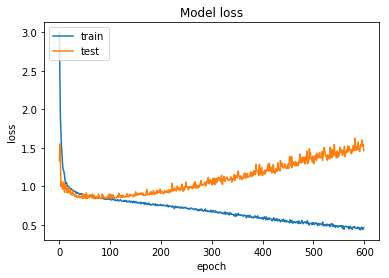

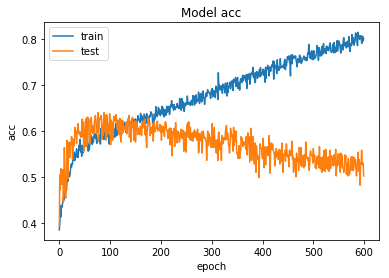

In [18]:
utils.plot_hist(hist)

In [19]:
hist = model.fit(np.array(X_train_c), np.array(to_categorical(Y_train_c)), 
                 epochs=120, batch_size=128,  verbose=0, validation_split=0.3)#, callbacks=[tbCallBack])

In [21]:
Y_pred = model.predict(np.array(X_test_c))

In [22]:
Y_pred = Y_pred.argmax(axis=-1)

              precision    recall  f1-score   support

     1.2year       0.49      0.56      0.52       128
    2.5years       0.45      0.43      0.44       145
        more       0.71      0.66      0.68       145

   micro avg       0.55      0.55      0.55       418
   macro avg       0.55      0.55      0.55       418
weighted avg       0.55      0.55      0.55       418

Accuracy: 0.5478468899521531


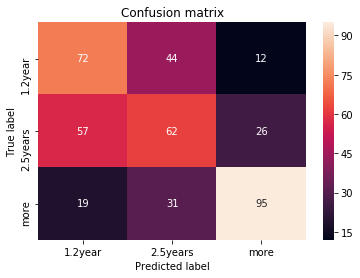

In [24]:
utils.plot_report(Y_test_c, Y_pred, labels)

## 2.3 Classification: Ensemble of models

In [60]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_dim = 53, kernel_initializer='he_normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [61]:
mp = mlp_model()

In [70]:
hist = mp.fit(np.array(X_train_c), np.array(to_categorical(Y_train_c)), epochs=300, batch_size=32,  verbose=0, 
              validation_split=0.3)#, callbacks=[tbCallBack])

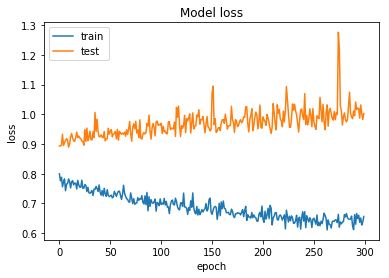

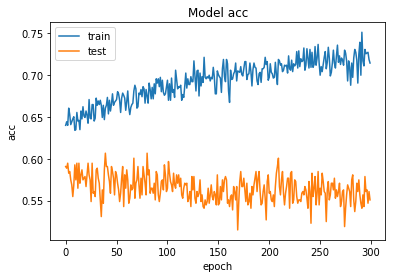

In [71]:
utils.plot_hist(hist)

In [72]:
# create 5 models to ensemble
model1 = KerasClassifier(build_fn = mlp_model, epochs = 150)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 150)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 150)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 150)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 150)

ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), 
                                              ('model3', model3), ('model4', model4), 
                                              ('model5', model5)], voting = 'soft')

In [73]:
ensemble_clf.fit(np.array(X_train_c), np.array(Y_train_c))

Epoch 1/150
1668/1668 [==============================] - 5s 3ms/step - loss: 1.1616 - acc: 0.4095
Epoch 2/150
1668/1668 [==============================] - 1s 346us/step - loss: 1.0508 - acc: 0.4754
Epoch 3/150
1668/1668 [==============================] - 1s 334us/step - loss: 1.0171 - acc: 0.4766
Epoch 4/150
1668/1668 [==============================] - 1s 312us/step - loss: 1.0239 - acc: 0.4760
Epoch 5/150
1668/1668 [==============================] - 0s 298us/step - loss: 0.9851 - acc: 0.5222
Epoch 6/150
1668/1668 [==============================] - 0s 280us/step - loss: 0.9769 - acc: 0.5144
Epoch 7/150
1668/1668 [==============================] - 0s 259us/step - loss: 0.9729 - acc: 0.5144
Epoch 8/150
1668/1668 [==============================] - 1s 346us/step - loss: 0.9765 - acc: 0.5048
Epoch 9/150
1668/1668 [==============================] - 0s 275us/step - loss: 0.9472 - acc: 0.5288
Epoch 10/150
1668/1668 [==============================] - 0s 278us/step - loss: 0.9374 - acc: 0.5480
E

1668/1668 [==============================] - 0s 218us/step - loss: 0.8147 - acc: 0.6265
Epoch 82/150
1668/1668 [==============================] - 0s 224us/step - loss: 0.8287 - acc: 0.6277
Epoch 83/150
1668/1668 [==============================] - 0s 232us/step - loss: 0.8227 - acc: 0.6133
Epoch 84/150
1668/1668 [==============================] - 0s 224us/step - loss: 0.8135 - acc: 0.6151
Epoch 85/150
1668/1668 [==============================] - 0s 222us/step - loss: 0.8268 - acc: 0.6271
Epoch 86/150
1668/1668 [==============================] - 0s 215us/step - loss: 0.8140 - acc: 0.6187
Epoch 87/150
1668/1668 [==============================] - 0s 204us/step - loss: 0.8157 - acc: 0.6157
Epoch 88/150
1668/1668 [==============================] - 0s 213us/step - loss: 0.8066 - acc: 0.6193
Epoch 89/150
1668/1668 [==============================] - 0s 203us/step - loss: 0.8315 - acc: 0.6199
Epoch 90/150
1668/1668 [==============================] - 0s 200us/step - loss: 0.8303 - acc: 0.6211
Epo

1668/1668 [==============================] - 0s 213us/step - loss: 0.9072 - acc: 0.5665
Epoch 12/150
1668/1668 [==============================] - 0s 207us/step - loss: 0.9104 - acc: 0.5695
Epoch 13/150
1668/1668 [==============================] - 0s 218us/step - loss: 0.9138 - acc: 0.5594
Epoch 14/150
1668/1668 [==============================] - 0s 211us/step - loss: 0.8949 - acc: 0.5737
Epoch 15/150
1668/1668 [==============================] - 0s 211us/step - loss: 0.8873 - acc: 0.5665
Epoch 16/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.9021 - acc: 0.5743
Epoch 17/150
1668/1668 [==============================] - 0s 207us/step - loss: 0.8930 - acc: 0.5719
Epoch 18/150
1668/1668 [==============================] - 0s 205us/step - loss: 0.8873 - acc: 0.5683
Epoch 19/150
1668/1668 [==============================] - 0s 207us/step - loss: 0.8948 - acc: 0.5761
Epoch 20/150
1668/1668 [==============================] - 0s 209us/step - loss: 0.8864 - acc: 0.5737
Epo

1668/1668 [==============================] - 0s 221us/step - loss: 0.8230 - acc: 0.6115
Epoch 93/150
1668/1668 [==============================] - 0s 229us/step - loss: 0.8102 - acc: 0.6283
Epoch 94/150
1668/1668 [==============================] - 0s 226us/step - loss: 0.8141 - acc: 0.6085
Epoch 95/150
1668/1668 [==============================] - 0s 230us/step - loss: 0.8204 - acc: 0.6151
Epoch 96/150
1668/1668 [==============================] - 0s 219us/step - loss: 0.8086 - acc: 0.6241
Epoch 97/150
1668/1668 [==============================] - 0s 224us/step - loss: 0.8065 - acc: 0.6259
Epoch 98/150
1668/1668 [==============================] - 0s 208us/step - loss: 0.8158 - acc: 0.6211
Epoch 99/150
1668/1668 [==============================] - 0s 246us/step - loss: 0.8111 - acc: 0.6265
Epoch 100/150
1668/1668 [==============================] - 0s 231us/step - loss: 0.8004 - acc: 0.6265
Epoch 101/150
1668/1668 [==============================] - 0s 252us/step - loss: 0.8144 - acc: 0.6205
E

1668/1668 [==============================] - 0s 216us/step - loss: 0.8883 - acc: 0.5707
Epoch 23/150
1668/1668 [==============================] - 0s 238us/step - loss: 0.8691 - acc: 0.5791
Epoch 24/150
1668/1668 [==============================] - 0s 224us/step - loss: 0.8672 - acc: 0.5839
Epoch 25/150
1668/1668 [==============================] - 0s 217us/step - loss: 0.8705 - acc: 0.5785
Epoch 26/150
1668/1668 [==============================] - 0s 219us/step - loss: 0.8737 - acc: 0.5845
Epoch 27/150
1668/1668 [==============================] - 0s 245us/step - loss: 0.8742 - acc: 0.5761
Epoch 28/150
1668/1668 [==============================] - 0s 232us/step - loss: 0.8718 - acc: 0.5959
Epoch 29/150
1668/1668 [==============================] - 0s 240us/step - loss: 0.8643 - acc: 0.5893
Epoch 30/150
1668/1668 [==============================] - 0s 247us/step - loss: 0.8791 - acc: 0.5689
Epoch 31/150
1668/1668 [==============================] - 0s 227us/step - loss: 0.8736 - acc: 0.5845
Epo

1668/1668 [==============================] - 0s 219us/step - loss: 0.8114 - acc: 0.6241
Epoch 104/150
1668/1668 [==============================] - 0s 223us/step - loss: 0.7969 - acc: 0.6379
Epoch 105/150
1668/1668 [==============================] - 0s 229us/step - loss: 0.8032 - acc: 0.6379
Epoch 106/150
1668/1668 [==============================] - 0s 221us/step - loss: 0.7958 - acc: 0.6295
Epoch 107/150
1668/1668 [==============================] - 0s 218us/step - loss: 0.7971 - acc: 0.6301
Epoch 108/150
1668/1668 [==============================] - 0s 228us/step - loss: 0.7953 - acc: 0.6409
Epoch 109/150
1668/1668 [==============================] - 0s 226us/step - loss: 0.7952 - acc: 0.6379
Epoch 110/150
1668/1668 [==============================] - 0s 218us/step - loss: 0.8093 - acc: 0.6355
Epoch 111/150
1668/1668 [==============================] - 0s 221us/step - loss: 0.8051 - acc: 0.6121
Epoch 112/150
1668/1668 [==============================] - 0s 218us/step - loss: 0.8028 - acc: 0

1668/1668 [==============================] - 0s 205us/step - loss: 0.8576 - acc: 0.6013
Epoch 34/150
1668/1668 [==============================] - 0s 230us/step - loss: 0.8622 - acc: 0.6031
Epoch 35/150
1668/1668 [==============================] - 0s 203us/step - loss: 0.8591 - acc: 0.5977
Epoch 36/150
1668/1668 [==============================] - 0s 203us/step - loss: 0.8574 - acc: 0.5953
Epoch 37/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.8668 - acc: 0.5845
Epoch 38/150
1668/1668 [==============================] - 0s 200us/step - loss: 0.8457 - acc: 0.5929
Epoch 39/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.8531 - acc: 0.5959
Epoch 40/150
1668/1668 [==============================] - 0s 232us/step - loss: 0.8466 - acc: 0.5983
Epoch 41/150
1668/1668 [==============================] - 0s 226us/step - loss: 0.8412 - acc: 0.6073
Epoch 42/150
1668/1668 [==============================] - 0s 216us/step - loss: 0.8476 - acc: 0.6091
Epo

1668/1668 [==============================] - 0s 219us/step - loss: 0.8163 - acc: 0.6199
Epoch 115/150
1668/1668 [==============================] - 0s 212us/step - loss: 0.8079 - acc: 0.6403
Epoch 116/150
1668/1668 [==============================] - 0s 212us/step - loss: 0.8048 - acc: 0.6313
Epoch 117/150
1668/1668 [==============================] - 0s 208us/step - loss: 0.7918 - acc: 0.6559
Epoch 118/150
1668/1668 [==============================] - 0s 209us/step - loss: 0.7921 - acc: 0.6235
Epoch 119/150
1668/1668 [==============================] - 0s 214us/step - loss: 0.7893 - acc: 0.6331
Epoch 120/150
1668/1668 [==============================] - 0s 204us/step - loss: 0.8015 - acc: 0.6289
Epoch 121/150
1668/1668 [==============================] - 0s 209us/step - loss: 0.7904 - acc: 0.6367
Epoch 122/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.7887 - acc: 0.6385
Epoch 123/150
1668/1668 [==============================] - 0s 206us/step - loss: 0.8076 - acc: 0

1668/1668 [==============================] - 0s 216us/step - loss: 0.8273 - acc: 0.6037
Epoch 45/150
1668/1668 [==============================] - 0s 214us/step - loss: 0.8445 - acc: 0.5917
Epoch 46/150
1668/1668 [==============================] - 0s 220us/step - loss: 0.8350 - acc: 0.6121
Epoch 47/150
1668/1668 [==============================] - 0s 213us/step - loss: 0.8475 - acc: 0.6097
Epoch 48/150
1668/1668 [==============================] - 0s 216us/step - loss: 0.8367 - acc: 0.6121
Epoch 49/150
1668/1668 [==============================] - 0s 216us/step - loss: 0.8279 - acc: 0.6007
Epoch 50/150
1668/1668 [==============================] - 0s 211us/step - loss: 0.8295 - acc: 0.6139
Epoch 51/150
1668/1668 [==============================] - 0s 211us/step - loss: 0.8294 - acc: 0.6157 0s - loss: 0.8248 - acc: 0.617
Epoch 52/150
1668/1668 [==============================] - 0s 224us/step - loss: 0.8229 - acc: 0.6103
Epoch 53/150
1668/1668 [==============================] - 0s 231us/step -

1668/1668 [==============================] - 0s 218us/step - loss: 0.7752 - acc: 0.6355
Epoch 125/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.7655 - acc: 0.6391
Epoch 126/150
1668/1668 [==============================] - 0s 219us/step - loss: 0.7836 - acc: 0.6433
Epoch 127/150
1668/1668 [==============================] - 0s 211us/step - loss: 0.7864 - acc: 0.6319
Epoch 128/150
1668/1668 [==============================] - 0s 218us/step - loss: 0.7956 - acc: 0.6283
Epoch 129/150
1668/1668 [==============================] - 0s 217us/step - loss: 0.7818 - acc: 0.6337
Epoch 130/150
1668/1668 [==============================] - 0s 217us/step - loss: 0.7714 - acc: 0.6463
Epoch 131/150
1668/1668 [==============================] - 0s 217us/step - loss: 0.7719 - acc: 0.6307
Epoch 132/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.7561 - acc: 0.6541
Epoch 133/150
1668/1668 [==============================] - 0s 210us/step - loss: 0.7729 - acc: 0

VotingClassifier(estimators=[('model1', <keras.wrappers.scikit_learn.KerasClassifier object at 0x1c43dc96a0>), ('model2', <keras.wrappers.scikit_learn.KerasClassifier object at 0x1c43dc9518>), ('model3', <keras.wrappers.scikit_learn.KerasClassifier object at 0x1c43dc93c8>), ('model4', <keras.wrappers.scikit_learn.KerasClassifier object at 0x1c43dc9438>), ('model5', <keras.wrappers.scikit_learn.KerasClassifier object at 0x1c43dc9e48>)],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [74]:
Y_pred = ensemble_clf.predict(np.array(X_test_c))

In [75]:
Y_proba = ensemble_clf.predict_proba(np.array(X_test_c))

In [76]:
print("Log loss: ",log_loss(Y_test_c,Y_proba))

Log loss:  0.8120065538734019


              precision    recall  f1-score   support

     1.2year       0.54      0.56      0.55       128
    2.5years       0.51      0.53      0.52       145
        more       0.79      0.72      0.76       145

   micro avg       0.61      0.61      0.61       418
   macro avg       0.61      0.61      0.61       418
weighted avg       0.62      0.61      0.61       418

Accuracy: 0.6076555023923444


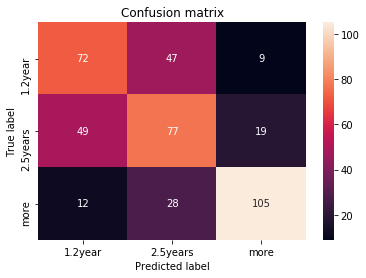

In [77]:
utils.plot_report(Y_test_c, Y_pred, labels)

## 3.1 Regression: Benchmark

In [ ]:
def test_kfolds(regressor, x, y, kfolds = [5]):
    for k_folds in kfolds:
        # evaluate model with standardized dataset
        np.random.seed(182)
        estimators = []
        #estimators.append(('standardize', StandardScaler()))
        estimators.append(('mlp', regressor))
        pipeline = Pipeline(estimators)
        kfold = KFold(n=X.shape[0], n_folds=k_folds)
        results = cross_val_score(pipeline, x, y, cv=kfold)
        print("K_folds {}: \nMean {} \nStd {}".format(k_folds, results.mean(), results.std()))

In [ ]:
# Need full dataset for cross validation
X = df.copy(deep=True)

Y = np.array(X['life_expectancy'])
# remove columns
X.drop('life_expectancy', axis = 1, inplace=True)
X.drop('life_expectancy_bin', axis = 1, inplace=True)

X = np.array(X)

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=54, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.MAPE,
                                                                        metrics.MSLE,
                                                                        metrics.MAE])
    return model

In [ ]:
bm = baseline_model()
hist = bm.fit(np.array(X_train_r), np.array(Y_train_r), 
                 epochs=600, batch_size=128,  verbose=0, validation_split=0.3)

In [ ]:
utils.plot_hist(hist)

In [ ]:
test_kfolds(KerasRegressor(build_fn=baseline_model, nb_epoch=150, batch_size=128, verbose=0), X, Y)

In [ ]:
bm.evaluate(np.array(X_test_r), np.array(Y_test_r))

## 3.2 Regression: Keras NN

In [ ]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(54, kernel_initializer="normal", input_dim=54, activation="relu"))
    model.add(Dense(27, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
test_kfolds(KerasRegressor(build_fn=larger_model, nb_epoch=150, batch_size=128, verbose=0), X, Y)

In [ ]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(540, kernel_initializer="normal", input_dim=54, activation="relu"))
    model.add(Dense(270, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
test_kfolds(KerasRegressor(build_fn=wider_model, nb_epoch=150, batch_size=128, verbose=0), X, Y)

## 3.3 Model showdown

Different approach for Classification vs. Regression using Neural Network:
- Training examples: Rn x {class_1, ..., class_n} (one-hot encoding) vs Rn x Rm
- Last layer: softmax vs linear / sigmoid
- Loss function: Cross entropy vs MSE / Absolute error

In [ ]:
model = Sequential()
model.add(Dense(50, kernel_initializer="normal", input_dim=54))
model.add(Activation('relu'))
model.add(Dense(1))
    
model.compile(optimizer = optimizers.SGD(lr = 0.001), loss = 'mean_squared_error', metrics = ['accuracy'])

history = model.fit(np.array(X_train), np.array(Y_train), epochs = 100, verbose = 1)

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.legend(['training', 'validation'], loc = 'upper left')
# plt.show()

results = model.evaluate(np.array(X_test), np.array(Y_test))
print('\nTest accuracy: ', results[1])

In [ ]:
model.summary()

## 4. Others

In [ ]:
#!pip install git+https://github.com/pybrain/pybrain.git

### 3.1 PyBrain: Regression

In [ ]:
from pybrain.structure import SigmoidLayer, LinearLayer, TanhLayer, ReluLayer, SoftmaxLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import pybrain.tools.shortcuts as pb
import numpy, math

# Build the dataset
xvalues = np.array(X_train_r)
yvalues = np.array(Y_train_r)
ds = SupervisedDataSet(54, 1)
for x, y in zip(xvalues, yvalues):
    ds.addSample((x), (y))
    
# Build the NN
nn1 = pb.buildNetwork(54,  # 1 input node
                   #108,    # number of nodes in 1st hidden layer
                   54,     # number of nodes in 4th hidden layer
                   1,     # 1 output node
                   bias = False,
                   hiddenclass = SigmoidLayer,
                   outclass = LinearLayer )

# Train the NN
trainer = BackpropTrainer(nn1, ds, learningrate = 0.01, weightdecay=0.01, momentum=0.02) #, verbose = True)
train_mse, validation_mse = trainer.trainUntilConvergence(maxEpochs = 20, continueEpochs=5, validationProportion=0.25)

##### Note on some of the parameters

**validationProportion**: ratio of the dataset that is used for the validation dataset.
If maxEpochs is given, at most that many epochs are trained. Each time validation error hits a minimum, try for continueEpochs # epochs to find a better one.

**Epoch**: one epoch means that every example has been seen once. It is preferable to track epochs rather than iterations since 
the number of iterations depends on the arbitrary setting of batch size. Batchs are used for example in the minibatch method,
for example, for 1000 examples, the NN is trained on examples 1-100, then examples 101-201, etc.

**Momentum**: 0 < m < 1 is a global parameter which must be determined by trial and error. Momentum simply adds a fraction m of the previous weight update to the current one. When the gradient keeps pointing in the same direction, this will increase the size of the steps taken towards the minimum. It is otherefore often necessary to reduce the global learning rate µ when using a lot of momentum (m close to 1). If you combine a high learning rate with a lot of momentum, you will rush past the minimum with huge steps! When the gradient keeps changing direction, momentum will smooth out the variations. Adding a momentum can help to speed up convergence to the minimum by damping oscillations.

In [ ]:
# Learning curves
plt.clf()
plt.plot(range(len(train_mse)), np.sqrt(train_mse), color='blue', label='training error')
plt.plot(range(len(validation_mse)), np.sqrt(validation_mse), color='red', label='validation error')
plt.title('Learning curves: loss(=RMSE) as a function of Epochs')
plt.legend()

## 4.2 Tensorflow Deep Neural Network Classifier

In [ ]:
from dnn_classifier import DNNClassifier
from sklearn.metrics import accuracy_score

In [8]:
dnn = DNNClassifier(show_progress=10, random_state=42)
dnn.fit(np.array(X_train_c), np.array(Y_train_c), n_epochs=100)

Y_pred = dnn.predict(X_test_c)
print("Score on test set: {:.2f}%".format(accuracy_score(Y_test_c, Y_pred) * 100))

Epoch: 1 Current training accuracy: 0.5500
Epoch: 11 Current training accuracy: 0.6000
Epoch: 21 Current training accuracy: 0.4000
Epoch: 31 Current training accuracy: 0.6000
Epoch: 41 Current training accuracy: 0.7000
Epoch: 51 Current training accuracy: 0.7000
Epoch: 61 Current training accuracy: 0.5000
Epoch: 71 Current training accuracy: 0.6500
Epoch: 81 Current training accuracy: 0.6500
Epoch: 91 Current training accuracy: 0.8000


### Try dropout to reduce overfitting

In [ ]:
dnn = DNNClassifier(dropout_rate=0.25, show_progress=10, random_state=42)
dnn.fit(np.array(X_train_c), np.array(Y_train_c), n_epochs=1000)

Y_pred = dnn.predict(X_test_c)
print("Score on test set: {:.2f}%".format(accuracy_score(Y_test_c, Y_pred) * 100))

Epoch: 1 Current training accuracy: 0.4500
Epoch: 11 Current training accuracy: 0.6000
Epoch: 21 Current training accuracy: 0.5000
